In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score

In [10]:
data = pd.read_csv("./Mobile Price/train.csv")

In [11]:
data.head()

,ID,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
data.shape

(2000, 22)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   int64  
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   int64  
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   int64  
 7   int_memory     2000 non-null   int64  
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

In [14]:
data.describe()

,ID,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,577.494589,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,1.000000,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1000.500000,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1500.250000,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,2000.000000,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
data.isna().sum()

ID               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
num_cols = data.iloc[:,1:-1].select_dtypes(exclude='object').columns.values


In [18]:
num_cols

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

In [19]:
le = LabelEncoder()

In [20]:
for i in data.iloc[:1,1:-1].columns:
  if data[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

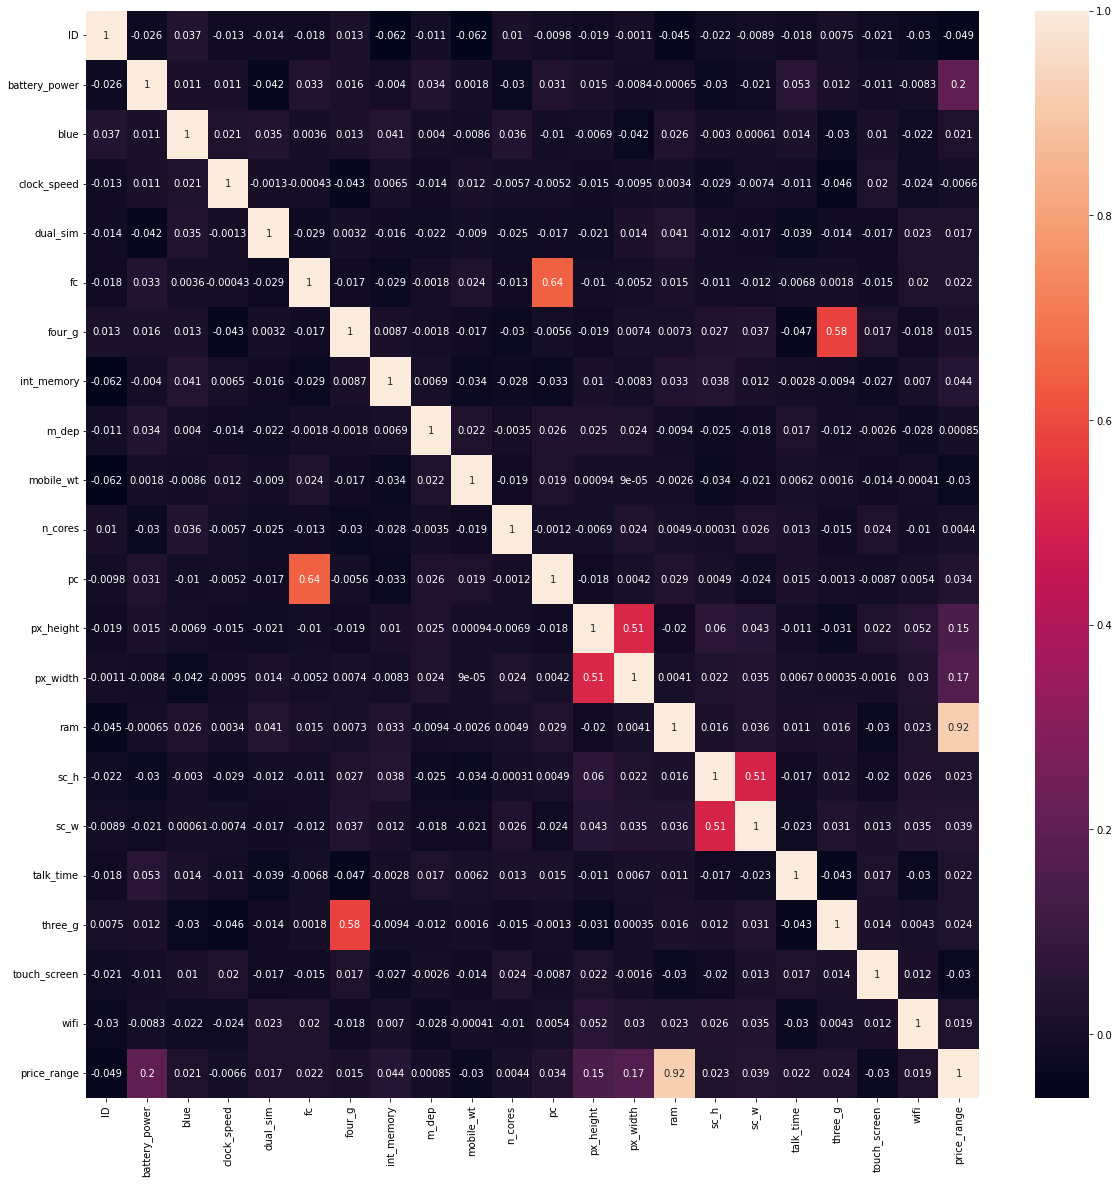

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [22]:
X = data.iloc[:,1:-1]
Y = data.iloc[:, -1]

In [23]:
Y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [24]:
le = LabelEncoder()

In [25]:
Y = le.fit_transform(Y)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [27]:
X_train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1719,833,1,0.6,1,0,1,27,0.3,145,4,2,649,1290,586,19,8,19,1,0,1
1702,1424,1,2.9,1,0,0,20,0.6,180,5,0,181,1199,2658,15,0,19,1,0,0
1287,860,1,1.3,1,1,1,49,0.7,141,6,13,692,979,3869,16,14,20,1,1,1
482,1330,1,1.3,1,14,0,3,0.3,83,5,17,980,1262,463,14,6,11,0,0,1
768,1149,1,2.2,0,4,0,30,0.2,106,6,5,1617,1675,3755,17,14,8,1,0,0


In [28]:
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0


In [29]:
Y_train.size

1400

In [30]:
Y_test.size

600

In [31]:
X_train.shape

(1400, 20)

In [32]:
X_test.shape

(600, 20)

In [33]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [34]:
decisiontree_model=DecisionTreeClassifier()
decisiontree_train=decisiontree_model.fit(X_train,Y_train)

In [35]:
decisiontree_predict = decisiontree_model.predict(X_test)

In [36]:
decisiontree_accuracy = accuracy_score(Y_test, decisiontree_predict) * 100

In [37]:
decisiontree_accuracy

82.0

In [38]:
Randomforest_model = RandomForestClassifier()

In [39]:
randomforest_train = Randomforest_model.fit(X_train, Y_train)

In [40]:
randomforest_predict = randomforest_train.predict(X_test)

In [41]:
randomforest_accuracy = accuracy_score(Y_test, randomforest_predict) * 100

In [42]:
randomforest_accuracy

87.16666666666667